## EDA

### Очистка

Автоматическая визуализация и представление датасета

In [35]:
import pandas as pd
import dtale

df = pd.read_csv('wine.csv')
d = dtale.show(df)
d

c:\Users\titor\anaconda3\lib\site-packages\dtale\views.py:746: FutureWarning:

['country', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'variety'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



### Дубликаты
Поиск дубликатов

In [30]:
import pandas as pd

df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
    })
display(df)

mask = df.duplicated()
duplicated_df = df[mask]                # Датасет с дубликатами
deduplicated_df = df.drop_duplicates()  # Создаем датасет без дубликатов
display(deduplicated_df)

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


### Пропуски

Визуализация процент пропусков в признаках

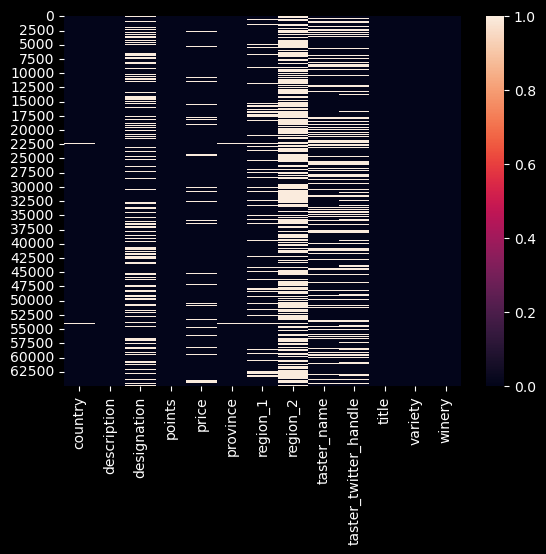

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wine.csv')

sns.heatmap(df.isnull());

Вывод процент пропусков в признаках

In [38]:
import pandas as pd

df = pd.read_csv('wine.csv')
df.drop_duplicates()

percent_of_nulls = df.isnull().mean()*100
colls_with_nulls = percent_of_nulls[percent_of_nulls > 0].sort_values(ascending=False)

print('Признаки с пропусками и процент пропусков:', colls_with_nulls, sep='\n')

Признаки с пропусками и процент пропусков:
region_2                 61.117779
designation              28.573847
taster_twitter_handle    24.154433
taster_name              20.275136
region_1                 16.375835
price                     6.924568
country                   0.052319
province                  0.052319
variety                   0.001539
dtype: float64


Удаление признаков с содержанием пропусков более 30% (например, `region_2`)

In [42]:
import pandas as pd

df = pd.read_csv('wine.csv')
df = df.drop_duplicates()

drop_colls_list = percent_of_nulls[percent_of_nulls > 30].index  
df = df.drop(labels=drop_colls_list, axis=1)

Заполнение пропусков значениями. Категориальные с большим кол-ом пропусков - _unknown_, остальные модой

In [44]:
values = {
    'designation': 'unknown',
    'taster_twitter_handle': 'unknown',
    'taster_name': 'unknown',
    'region_1': 'unknown',
    'country': df['country'].mode()[0],
    'province': df['province'].mode()[0],
    'variety': df['variety'].mode()[0],
    'price': df['price'].mean()
    }

df = df.fillna(value=values)